In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = pd.read_csv("data/cleaned_data.csv")
df = df[df['Year'] < 2023]
df

,Unnamed: 0,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall,ExtremeRainfall
0,0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,1,False
1,1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,1,False
2,2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,1,False
3,3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,1,False
4,4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6197,6197,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0,1,False
6198,6198,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0,1,False
6199,6199,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0,1,False
6200,6200,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0,1,False


In [17]:
df.drop(['Unnamed: 0', 'Rainfall', 'ExtremeRainfall'], axis=1, inplace=True)
df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0
1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0
2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0
3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0
4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0
...,...,...,...,...,...,...,...,...,...
6197,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0
6198,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0
6199,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0
6200,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0


In [18]:
df.isna().sum()

Year             0
Month            0
Day              0
MaxT             0
MinT             0
AvgT             0
WindSpeed        0
Humidity         0
Precipitation    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6202 entries, 0 to 6201
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           6202 non-null   int64  
 1   Month          6202 non-null   int64  
 2   Day            6202 non-null   int64  
 3   MaxT           6202 non-null   float64
 4   MinT           6202 non-null   float64
 5   AvgT           6202 non-null   float64
 6   WindSpeed      6202 non-null   float64
 7   Humidity       6202 non-null   float64
 8   Precipitation  6202 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 484.5 KB


In [20]:
df.describe()

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
count,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000,6202.000000
mean,2014.009029,6.529345,15.742341,33.345630,24.773783,29.059707,2.825314,67.155160,3.445292
std,4.894492,3.445878,8.796452,3.273129,3.085633,2.907412,1.060653,11.332994,8.288860
min,2006.000000,1.000000,1.000000,21.900000,14.400000,20.550000,0.500000,30.500000,0.000000
25%,2010.000000,4.000000,8.000000,30.900000,22.500000,26.850000,2.100000,59.500000,0.000000
50%,2014.000000,7.000000,16.000000,33.000000,25.400000,29.050000,2.500000,68.300000,0.000000
75%,2018.000000,10.000000,23.000000,35.300000,27.000000,31.000000,3.400000,75.675000,2.600000
max,2022.000000,12.000000,31.000000,48.000000,33.000000,39.500000,7.900000,95.100000,128.300000


<Axes: >

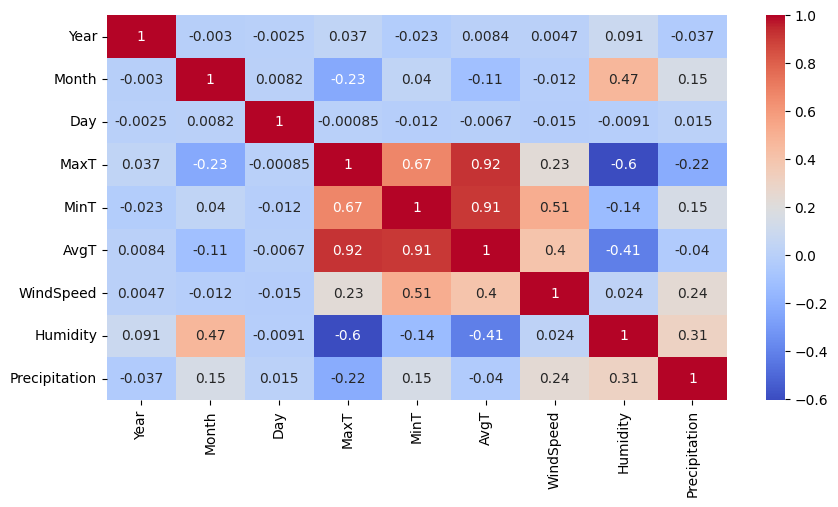

In [21]:
# A correlation heat map for each pair of explanatory variables.
plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Precipitation and Humidity Correlation

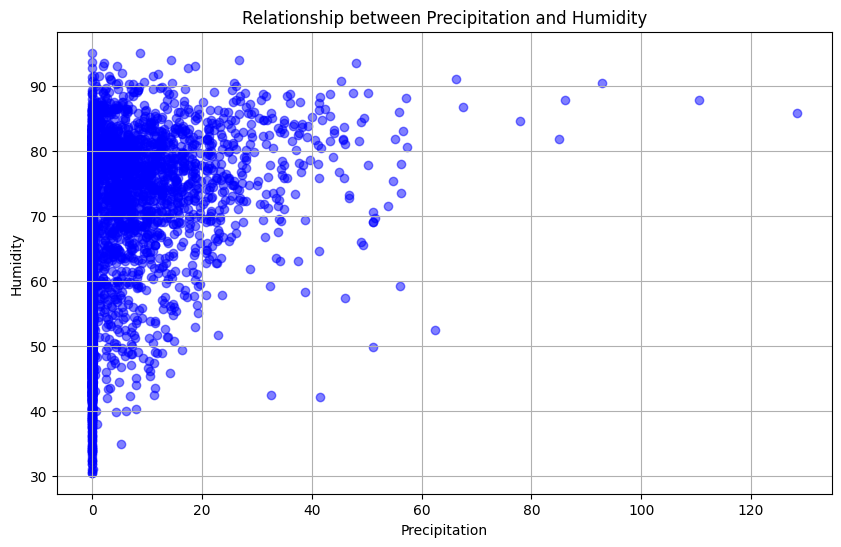

In [23]:
def bar_graph(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], color='blue', alpha=0.5)
    plt.title(f'Relationship between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'Humidity'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Windspeed Correlation

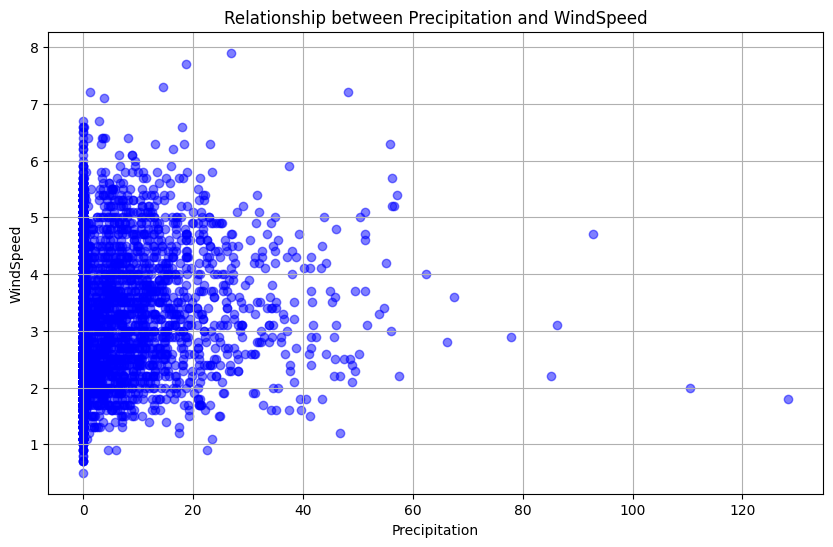

In [24]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'WindSpeed'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Max Temperature

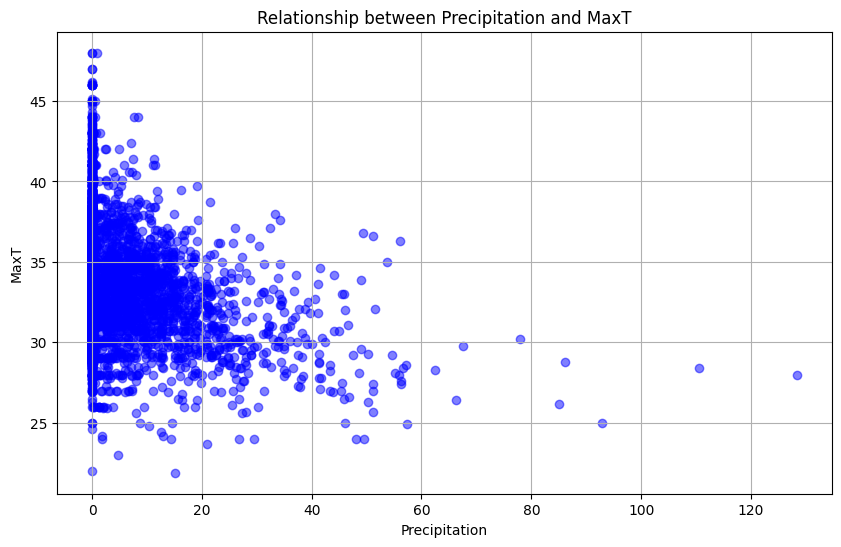

In [25]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'MaxT'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Minimum Temperature

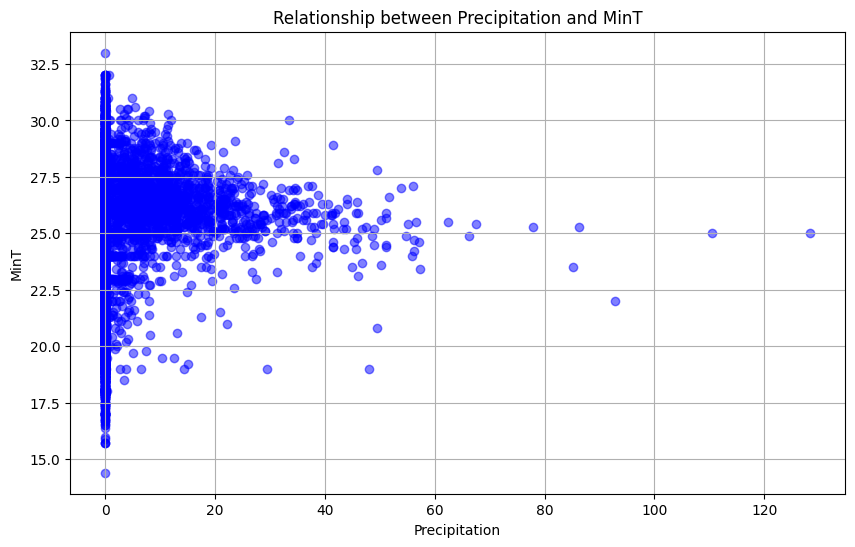

In [26]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'MinT'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

# Precipitation and Month Correlation

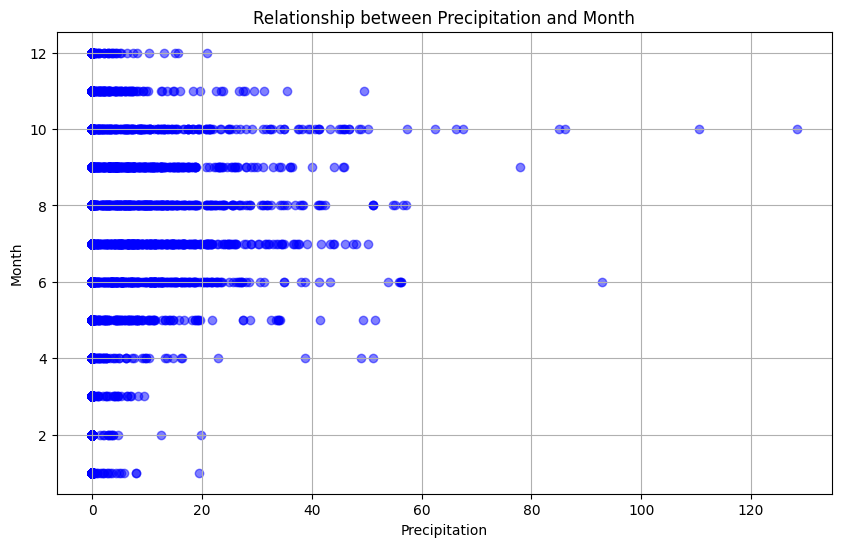

In [27]:
# Now, call the bar_graph function directly with your choice of x and y
x_column = 'Precipitation'  # Example: Choose the column name for the x-axis
y_column = 'Month'  # Example: Choose the column name for the y-axis
bar_graph(x_column, y_column)

In [40]:
df[df['Precipitation'] == 0.0]

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation
0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0
1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0
2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0
3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0
4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0
...,...,...,...,...,...,...,...,...,...
6197,2022,12,27,34.0,21.0,27.50,2.0,72.0,0.0
6198,2022,12,28,35.0,21.0,28.00,1.6,68.0,0.0
6199,2022,12,29,35.0,22.0,28.50,1.8,67.0,0.0
6200,2022,12,30,35.0,21.0,28.00,1.2,64.5,0.0


# Train and Test Split

In [78]:
from sklearn.model_selection import train_test_split

X = df.drop(['Precipitation'], axis=1)
y = df['Precipitation']

trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

model.fit(trainX, trainY)

prediction = model.predict(testX)

In [80]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse = mean_squared_error(testY, prediction)
# Print the MSE and R-squared value
print(f"Mean Squared Error for Linear Regression: {mse}")

r2 = r2_score(testY, prediction)
print(f"r2 score for Linear Regression: {r2}")

Mean Squared Error for Linear Regression: 26.53884459790492
r2 score for Linear Regression: 0.5776019112942654


In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [95]:
from sklearn.preprocessing import StandardScaler

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Assume 'Precipitation' is the target variable and the rest are features
X = df.drop(['Precipitation'], axis=1)
y = df['Precipitation']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

# Model Building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(trainX.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (predicts precipitation in mm)
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Model Training
model.fit(trainX, trainY, epochs=10, validation_split=0.2, batch_size=32)

# Model Evaluation
model.evaluate(testX, testY)

Epoch 1/10
124/124 [==============================] - 0s 864us/step - loss: 2.9852 - accuracy: 0.6651 - val_loss: 2.3599 - val_accuracy: 0.6556
Epoch 2/10
124/124 [==============================] - 0s 483us/step - loss: 2.3006 - accuracy: 0.6721 - val_loss: 2.1705 - val_accuracy: 0.6717
Epoch 3/10
124/124 [==============================] - 0s 476us/step - loss: 2.1845 - accuracy: 0.6784 - val_loss: 2.1280 - val_accuracy: 0.6727
Epoch 4/10
124/124 [==============================] - 0s 468us/step - loss: 2.1219 - accuracy: 0.6802 - val_loss: 2.1059 - val_accuracy: 0.6727
Epoch 5/10
124/124 [==============================] - 0s 473us/step - loss: 2.0836 - accuracy: 0.6817 - val_loss: 2.0665 - val_accuracy: 0.6727
Epoch 6/10
124/124 [==============================] - 0s 466us/step - loss: 2.0493 - accuracy: 0.6817 - val_loss: 2.0547 - val_accuracy: 0.6737
Epoch 7/10
124/124 [==============================] - 0s 492us/step - loss: 2.0390 - accuracy: 0.6815 - val_loss: 2.0472 - val_accuracy:

[1.9469658136367798, 0.7082997560501099]

In [96]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your features and target variable
X = df.drop(['Precipitation'], axis=1)
y = df['Precipitation']

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on your training data
model.fit(trainX, trainY)

# Make predictions on the test set
predictions = model.predict(testX)

In [97]:
# Calculate and print the MSE and R2 score
mse = mean_squared_error(testY, predictions)
r2 = r2_score(testY, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 28.05409458280148
R2 Score: 0.553484859205938
